In [26]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
from tqdm import tqdm
import ROOT
import math
'''
from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *
from isolation import *
'''
import matplotlib as mpl

#mpl.rc('xtick', labelsize=16) 
#mpl.rc('ytick', labelsize=16) 
#mpl.rc('axes', labelsize=16, titlesize=20)
#mpl.rcParams["legend.title_fontsize"]=18

#plt.style.use(hep.style.CMS)
%matplotlib inline
lw=1.2

In [29]:


filename = "./Energy_Bins/SinglePionTiming_2p2_100GeV/histo/histo_14804_0.root"#output.root"
file = uproot.open(filename)

file.keys()



['ticlDumper;1',
 'ticlDumper/trackstersCLUE3DHigh;1',
 'ticlDumper/trackstersTiclCandidate;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/simtracksters2HitsSC;1',
 'ticlDumper/simtracksters2HitsCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/associations;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [30]:
f_associations = file["ticlDumper/associations;1"]
f_associations = file["ticlDumper/simTICLCandidate;1"]
f_candidates=file["ticlDumper/candidates;1"]
f_trackstersTICL=file["ticlDumper/trackstersTiclCandidate;1"]

In [31]:
print(f_associations.keys())
print(f_candidates.keys())
print(f_trackstersTICL.keys())

['event', 'event/run_', 'event/luminosityBlock_', 'event/event_', 'simTICLCandidate_raw_energy', 'simTICLCandidate_regressed_energy', 'simTICLCandidate_simTracksterCPIndex', 'simTICLCandidate_boundaryX', 'simTICLCandidate_boundaryY', 'simTICLCandidate_boundaryZ', 'simTICLCandidate_boundaryPx', 'simTICLCandidate_boundaryPy', 'simTICLCandidate_boundaryPz', 'simTICLCandidate_time', 'simTICLCandidate_caloParticleMass', 'simTICLCandidate_pdgId', 'simTICLCandidate_charge', 'simTICLCandidate_track_in_candidate']
['event', 'event/run_', 'event/luminosityBlock_', 'event/event_', 'NCandidates', 'candidate_charge', 'candidate_pdgId', 'candidate_id_probabilities', 'candidate_time', 'candidate_timeErr', 'candidate_time_MTD', 'candidate_time_MTD_err', 'candidate_energy', 'candidate_raw_energy', 'candidate_px', 'candidate_py', 'candidate_pz', 'track_in_candidate', 'tracksters_in_candidate']
['event', 'event/run_', 'event/luminosityBlock_', 'event/event_', 'NTracksters', 'NClusters', 'time', 'timeErro

In [32]:
f_associations["simTICLCandidate_time"].array()[2]

<Array [-0.239, -0.239, -0.239, -0.239] type='4 * float32'>

In [33]:
f_trackstersTICL["vertices_x"].array()[0]


<Array [[72.8, 72.3, 74.1, ... 30, 29, 27.3]] type='15 * var * float64'>

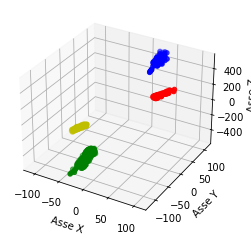

In [39]:

fig = plt.figure()

# Aggiunta di un sistema di assi 3D
ax = fig.add_subplot(111, projection='3d')

# Visualizzazione dei punti
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][0],f_trackstersTICL["vertices_y"].array()[0][0],f_trackstersTICL["vertices_z"].array()[0][0], c='r', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][1],f_trackstersTICL["vertices_y"].array()[0][1],f_trackstersTICL["vertices_z"].array()[0][1], c='b', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][2],f_trackstersTICL["vertices_y"].array()[0][2],f_trackstersTICL["vertices_z"].array()[0][2], c='g', marker='o')
ax.scatter(f_trackstersTICL["vertices_x"].array()[0][3],f_trackstersTICL["vertices_y"].array()[0][3],f_trackstersTICL["vertices_z"].array()[0][3], c='y', marker='o')

# Aggiunta di etichette per gli assi
ax.set_xlabel('Asse X')
ax.set_ylabel('Asse Y')
ax.set_zlabel('Asse Z')
plt.show()
